In [39]:
library(tidyverse)



In [40]:
df <- read.csv('../data/N-seaice-extent-daily.csv')

In [41]:
head(df)

,Year,Month,Day,Extent,Missing,Source.Data
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1978,10,26,10.231,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19781026_n07_v1.1_n.bin']
2,1978,10,28,10.420,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19781028_n07_v1.1_n.bin']
3,1978,10,30,10.557,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19781030_n07_v1.1_n.bin']
4,1978,11,1,10.670,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19781101_n07_v1.1_n.bin']
5,1978,11,3,10.777,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19781103_n07_v1.1_n.bin']
6,1978,11,5,10.968,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.05/nt_19781105_n07_v1.1_n.bin']


In [ ]:
df_summed <- df %>% 
    group_by(Year, Month) %>%
    summarise(monthly_extent = mean(Extent)) 

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


In [43]:
head(df_summed)

Year,Month,monthly_extent
<int>,<int>,<dbl>
1978,10,10.40267
1978,11,11.64513
1978,12,13.66706
1979,1,15.41400
1979,2,16.17529
1979,3,16.34194


### Summarized Data

`geom_smooth()` using formula = 'y ~ x'


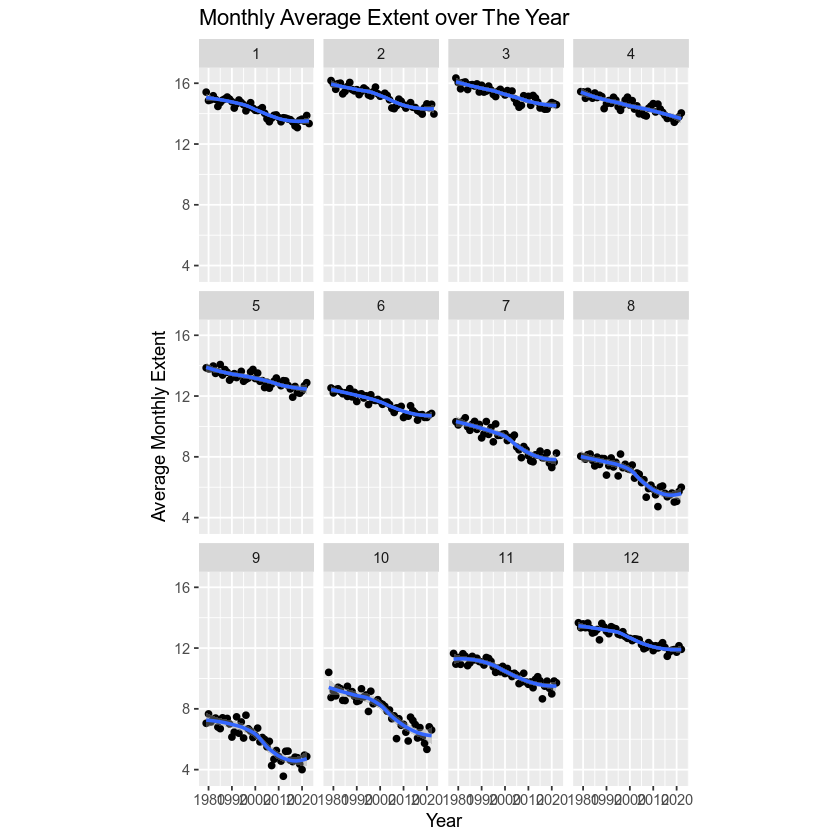

In [60]:
ggplot(df_summed, aes(x = Year, y= monthly_extent, groups=Month)) +
    geom_point() + 
    facet_wrap(~Month) + 
    geom_smooth(method = "loess") + 
    coord_fixed(ratio = 6.5) +
    labs(title="Monthly Average Extent over The Year ", x= "Year", y= "Average Monthly Extent")

### Raw Data/ No averaging

`geom_smooth()` using formula = 'y ~ x'


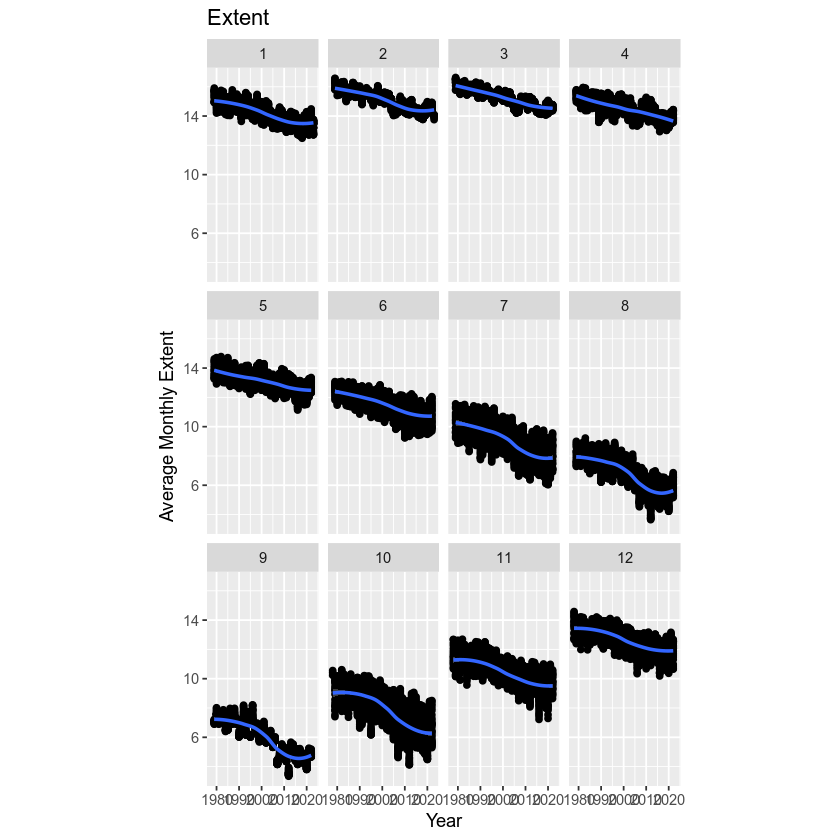

In [61]:
ggplot(df, aes(x = Year, y= Extent, groups=Month)) +
    geom_point() + 
    facet_wrap(~Month) + 
    geom_smooth(method = "loess") + 
    coord_fixed(ratio = 6.5) +
    labs(title="Extent", x= "Year", y= "Average Monthly Extent")

### Observations 


We notice that when taking the average values we lose some information regarding the volatility of the trend lines. This pattern is evident specifically in July, October, and November in which the average extent line fails to consider the variability in the relationship between year and extent